In [2]:
import glob, serial, time, math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from skimage.transform import iradon
from IPython.display import display
import random

In [2]:
ports = glob.glob('/dev/tty[A-Za-z]*') # Modify if on a platform other than Linux
ports[0]

'/dev/ttyACM3'

In [ ]:
ser = serial.Serial(ports[0], 115200)

In [4]:
ds = {0:b'i',
     7:b'j',
     3:b'k',
     4:b'l',
     2:b'm',
     5:b'n',
     6:b'o',
     1:b'p'}

es = {0:b'a',
     7:b'b',
     1:b'c',
     6:b'd',
     2:b'e',
     4:b'f',
     3:b'g',
     5:b'h'}

def read_d(d):
    ser.write(ds[d])
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def set_l(l):
    ser.write(es[l])
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def loff():
    ser.write(b'A')
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def read_all():
    a = []
    # Take a base set of readings
    loff()
    for d in range(8):
        a.append(int(read_d(d).strip()))
    for l in range(8):
        loff()
        set_l(l)
        for d in range(8):
            a.append(int(read_d(d).strip()))
        loff()
    return a

In [5]:
%matplotlib inline

In [338]:
from IPython.display import clear_output

X = []
y = []



In [397]:
for i in range(300):
#     fig, ax = plt.subplots()
    readings = read_all()
    X.append(readings)
    y.append([0,0]) # 0 = empty, 1-4 = quadrants. # 0 = nothing, 1=pen back, 2=cutter back, 3=shiny pen, 4=finger

In [3]:
# df1 = pd.DataFrame(X)
# df1['quadrant'] = [m[0] for m in y]
# df1['object'] = [m[1] for m in y]
# objects = {0:'empty', 1:'black_pen_back', 2:'cutter_back', 3:'shiny_pen', 4:'finger'}
# df1['object_name'] = [objects[m[1]] for m in y]
# df1.to_csv('dataset_2qr.csv')

df1 = pd.read_csv('dataset_2q.csv')
df1 = df1.drop('Unnamed: 0', axis=1)

In [4]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,quadrant,object,object_name
0,740,738,733,736,744,727,729,749,721,734,...,554,721,728,727,724,723,727,0,0,empty
1,747,736,736,719,729,734,721,734,729,722,...,543,740,721,741,723,716,724,0,0,empty
2,738,727,730,721,738,734,722,741,734,728,...,552,739,716,714,728,720,740,0,0,empty
3,748,734,738,737,756,743,722,744,728,733,...,550,746,730,724,723,713,730,0,0,empty
4,744,737,740,746,738,746,717,738,737,734,...,539,736,725,731,717,725,732,0,0,empty


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df1[[str(i) for i in range(72)]], df1['object'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlpc.fit(X_train, y_train)
mlpc.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df3 = df1.loc[df1['object']%4 < 2] # What a hack. This excludes classes 2 and 3, but not 0, 1 and 4!
X_train, X_test, y_train, y_test = train_test_split(df3[[str(i) for i in range(72)]], df3['object'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlpc.fit(X_train, y_train)
mlpc.score(X_test, y_test)

0.98

In [7]:
# Do confusion matrix (can do for prev as well)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, mlpc.predict(X_test))

array([[ 97,   1,   0],
       [  0,  92,   1],
       [  0,   4, 105]])

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1[[str(i) for i in range(72)]], df1['quadrant'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scores = []
ns = []
for i in range(10, 1000, 10):
    mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
    mlpc.fit(X_train[:i], y_train[:i])
    scores.append(mlpc.score(X_test, y_test))
    ns.append(i)

# mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
# mlpc.fit(X_train, y_train)
# mlpc.score(X_test, y_test)

/home/jonathan/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [12]:
df3 = df1.loc[df1['object']%4 < 2] # What a hack. This excludes classes 2 and 3, but not 0, 1 and 4!
X_train, X_test, y_train, y_test = train_test_split(df3[[str(i) for i in range(72)]], df3['object'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scores = []
ns = []
for i in range(10, 1000, 10):
    mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
    mlpc.fit(X_train[:i], y_train[:i])
    scores.append(mlpc.score(X_test, y_test))
    ns.append(i)   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df1[[str(i) for i in range(72)]], df1['object'])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scores2 = []
ns = []
for i in range(10, 1000, 10):
    mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
    mlpc.fit(X_train[:i], y_train[:i])
    scores2.append(mlpc.score(X_test, y_test))
    ns.append(i)

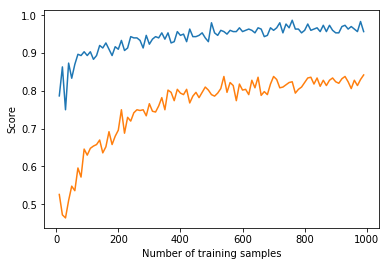

In [16]:
plt.plot(ns, scores, label='All classes')
plt.plot(ns, scores2, label='Finger vs Pen')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.savefig('ring_of_8_classification.png')

Text(0,0.5,'Score')

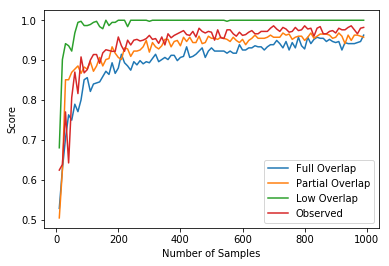

In [23]:
sdf = pd.read_csv('scores_simulation_ring_of_8_overlap_varied.csv')
sdf['Observed'] = scores
ax = sdf.plot(x='Number of Samples')
ax.set_ylabel('Score')

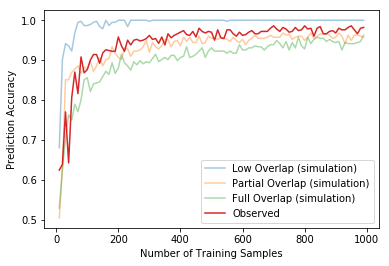

In [24]:
plt.plot(ns, sdf['Low Overlap'], alpha=0.4, label = 'Low Overlap (simulation)')
plt.plot(ns, sdf['Partial Overlap'], alpha=0.4, label = 'Partial Overlap (simulation)')
plt.plot(ns, sdf['Full Overlap'], alpha=0.4, label = 'Full Overlap (simulation)')

plt.plot(ns, sdf['Observed'])
plt.xlabel('Number of Training Samples')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.savefig('ring_of_8_observed_accuracy_vs_prediction_alpha.png')

In [87]:
import pandas as pd
Xdf = pd.DataFrame(X)
Xdf['class'] = y
Xdf.to_csv('quadrants.csv')

In [79]:
while True:
    readings = read_all()
    Xt2 = scaler.transform([readings])
    print(mlpc.predict(Xt2))
    clear_output(wait=True)

KeyboardInterrupt: 

In [269]:
X = []
y = []

In [271]:
for i in range(40):
    readings = read_all()
    X.append(readings)
    y.append(2) # 0 empty, 1 finger, 2 pen

In [139]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[-120:], y[-120:])

scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlpc.fit(X_train2, y_train2)
mlpc.score(X_test2, y_test2)

1.0

In [194]:
readings = read_all()
Xt2 = scaler.transform([readings])
p = mlpc.predict(Xt2)[0]
if p == 0:
    print('Empty')
elif p == 1:
    print('Finger')
else:
    print('Pen')

Pen


In [138]:
y_test2

[0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

KeyboardInterrupt: 

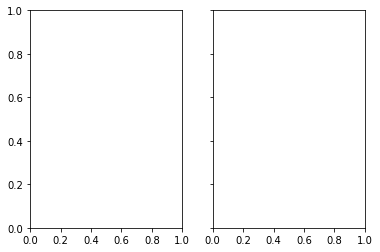

In [66]:
while True:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    a = read_all()
    for e in range(8):
        for d in range(8):
            a[(e+1)*8 + d] -= a[d]
        ax2.plot(a[(e+1)*8:][:8])
    ax1.plot(a[8:])
    ax1.set_ylim(-500, 200)
    plt.show()
#     time.sleep(0.3)
    clear_output(wait=True)

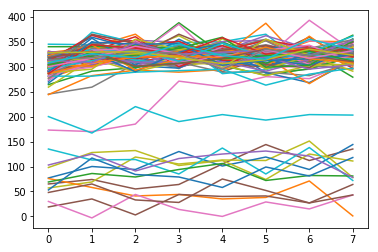

In [71]:
a = []
for i in range(100):
    time.sleep(0.2)
    s = ''
    vals = []
    v2 = []
    for i in range(8):
        v = int(read_d(0).strip())
        s += ", "
        s += str(v)
        vals.append(v)
    set_l(0) # Turn on LED
    time.sleep(0.2)
    for i in range(8):
        v = int(read_d(0).strip())
        v2.append(v)
        s += ", "
        s += str(v)
    loff(0) # LEDs off
    arr.append(vals)
    arr2.append(v2)
    a1 = np.asarray(vals)
    a2 = np.asarray(v2)
    print(a1-a2)
    plt.plot(a1-a2)
    clear_output(wait=True)

In [61]:
ser.read_all()

b''

In [62]:
a1 = np.asarray(arr)
a2 = np.asarray(arr2)
print(a1-a2)

[[ 11 -24  14 -20  16  16  -2 -22]
 [282 329 342 321 321 322 350 304]
 [323 294 321 340 315 360 346 291]
 [287 333 308 318 293 317 339 295]
 [293 324 333 316 313 330 318 364]
 [306 346 334 321 312 336 321 329]
 [309 347 331 301 336 320 331 321]
 [308 320 312 355 344 352 302 324]
 [291 313 310 336 324 346 340 307]
 [288 353 319 321 300 325 322 281]]


In [64]:
a1 = np.asarray(arr)
a2 = np.asarray(arr2)
print(a1-a2)

[[253 343 327 338 335 303 319 322]
 [ 72 101 104  76  62 100  71  45]
 [ 57  49   7  26  29  66  50  11]
 [ 34  70  40  43  33  45  -2  37]
 [ 42   8  43  36  28  33  58  52]
 [ 35  63  13  31  50   4  15  -7]
 [ 22  13  45  17  15  51  51  22]
 [ 47  64  10  38  43  28  21  16]
 [ 49  60  19  39  26  61   5  14]
 [ 33  29  60  17  39  54  33  21]]
